<span style="font-size:200%; text-align:left;"><b>Lab setup of long SRC in a Michelson</b></span>
<br/>



# Importing packages

In [1]:
import pykat
import pykat.ifo as ifo
import pykat.ifo.aligo as aligo
import pykat.ifo.aligo.plot
from pykat.optics import ABCD as a

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

import pickle
import matplotlib as mpl
mpl.rcParams['axes.formatter.useoffset']=False


from scipy.optimize import minimize
from pykat.optics.gaussian_beams import BeamParam

                                              ..-
    PyKat develop         _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,
   `^-....____:   +.      www.gwoptics.org/pykat



## The model

In [2]:
base = pykat.finesse.kat()
base.verbose = True
base.load("LongSRC_design_14Oct.kat")

base.removeBlock('Photodiodes')


# Run 0
SRC parameters without TSRC
## Constraints

In [3]:
RoC = [0.1,0.25,0.5,0.75,1,1.333,1.5,2,3,4,5,6.667,10]   # RoCs available off the shelf


RoC_EX = 5
RoC_EY = 5


w_crys = 30e-6

# Constraints
w_bs = 3.4e-3
w_etm = 4.8e-3
w_srm = 4.8e-3
w_tsrm = 4.8e-3

## Resonance conditions for carrier in SRC

--------------------------------------------------------------
Running kat - Started at 2019-10-14 11:17:52.875125

Finished in 0.022239 seconds


100% | ETA:  0:00:00 | Calculating                                             

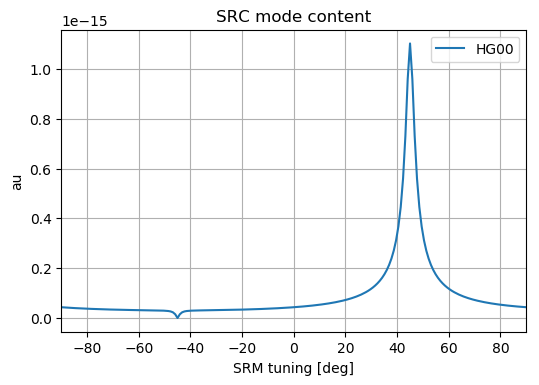

In [4]:
kat = base.deepcopy()
kat.maxtem = 'off'
kat.cTSRM.remove()

kat.parse("""
ad C 0 0 0 nSRM1
pd P_HOM nSRM1*
xaxis SRM phi lin -90 90 200

yaxis abs
""")
kat.eom1.midx = 0
out = kat.run()

fig = plt.figure(dpi=100)
ax = fig.add_subplot(111)
#ax.plot(out.x,out['P_HOM'],label = 'DC output')
ax.plot(out.x, out['C'],label = 'HG00')


ax.set_xlim(out.x.min(),out.x.max())
ax.grid()
ax.legend()
ax.set_title('SRC mode content')
ax.set_xlabel('SRM tuning [deg]')
ax.set_ylabel('au')
plt.show(fig)




## Current SRC parameters

In [5]:
kat = base.deepcopy()
kat.cTSRM.remove()

kat.parse("""
bp w_ex x w nEMx
bp w_ey x w nEMy
bp w_bs x w nBS4
bp w_srm x w nSRM1

cp cSRMX x m
cp cSRMY x m
cp cSRMX y m
cp cSRMY y m 

noxaxis
yaxis abs

mismatches
""")
kat.eom1.midx = 0

out = kat.run()
print(out.stdout)
print()
print('      w (mm) max_w (mm)')
print('EX:  {:.4f}   {} '.format(out['w_ex']*1e3, w_etm*1e3 ))
print('EY:  {:.4f}   {} '.format(out['w_ey']*1e3, w_etm*1e3 ))
print('BS:  {:.4f}   {} '.format(out['w_bs']*1e3, w_bs*1e3 ))
print('SRM: {:.4f}   {} '.format(out['w_srm']*1e3, w_srm*1e3 ))

print()

print('EX:  diff = {:.2f} mm, rdiff = {:.2} '.format((out['w_ex']-w_etm)*1e3, (out['w_ex']-w_etm)/np.abs(w_etm) ) )
print('EY:  diff = {:.2f} mm, rdiff = {:.2} '.format((out['w_ey']-w_etm)*1e3, (out['w_ey']-w_etm)/np.abs(w_etm) ) )
print('BS:  diff = {:.2f} mm, rdiff = {:.2} '.format((out['w_bs']-w_bs)*1e3, (out['w_bs']-w_bs)/np.abs(w_bs) ) )
print('SRM: diff = {:.2f} mm, rdiff = {:.2} '.format((out['w_srm']-w_srm)*1e3, (out['w_srm']-w_srm)/np.abs(w_srm) ) )
print()

# Checking stability
# --------------------
mX_x = np.abs(out['cSRMX_x_m'])
mY_x = np.abs(out['cSRMY_x_m'])
mX_y = np.abs(out['cSRMX_x_m'])
mY_y = np.abs(out['cSRMY_x_m'])

if (not (mX_x > -1 and mX_x < 1) or not (mX_y > -1 and mX_y < 1) or 
    not (mY_x > -1 and mY_x < 1) or not (mY_y > -1 and mY_y < 1)):
    print('Cavity is unstable!!!!! :(')
    print('Stability parameters: {}  {}  {}  {}'.format(mX_x, mY_x, mX_y, mY_y))
else:
    print('Cavity is stable! :) ')
    print('Stability parameters: {}  {}  {}  {}'.format(mX_x, mY_x, mX_y, mY_y))
# --------------------
  
    


Parsing `mismatches` into pykat object not implemented yet, added as extra line.
--------------------------------------------------------------
Running kat - Started at 2019-10-14 11:17:53.054557

Finished in 0.0154192 seconds

------------------------------------------------------------------------
                     FINESSE 2.2                (build 2.2-31-ge1141681)
       o_.-=.        Frequency domain INterferomEter Simulation SoftwarE
      (\'".\|        06.03.2019         http://www.gwoptics.org/finesse/
      .>' (_--.      
   _=/d   ,^\        Input file /var/folders/k1/yts33d_93v1_9yd1768nkwph0000gn/T/tmpbwfl_hwi.kat,
  ~~ \)-'   '        Output file /var/folders/k1/yts33d_93v1_9yd1768nkwph0000gn/T/tmpbwfl_hwi.out,
     / |             Gnuplot file /var/folders/k1/yts33d_93v1_9yd1768nkwph0000gn/T/tmpbwfl_hwi.gnu 
    '  '                                        Mon Oct 14 11:17:53 2019
------------------------------------------------------------------------
 'noxaxis' has 

100% | ETA:  0:00:00 | Calculating                                             

## HOM spacing in SRC

Parsing `tem Laser 0 0 1.0 0.0` into pykat object not implemented yet, added as extra line.
Parsing `tem Laser 1 0 1.0 0.0` into pykat object not implemented yet, added as extra line.
Parsing `tem Laser 2 0 1.0 0.0` into pykat object not implemented yet, added as extra line.
Parsing `tem Laser 3 0 1.0 0.0` into pykat object not implemented yet, added as extra line.
Parsing `tem Laser 4 0 1.0 0.0` into pykat object not implemented yet, added as extra line.
--------------------------------------------------------------
Running kat - Started at 2019-10-14 11:17:53.095206


100% | ETA:  0:00:00 | Calculating                                             


Finished in 0.339953 seconds


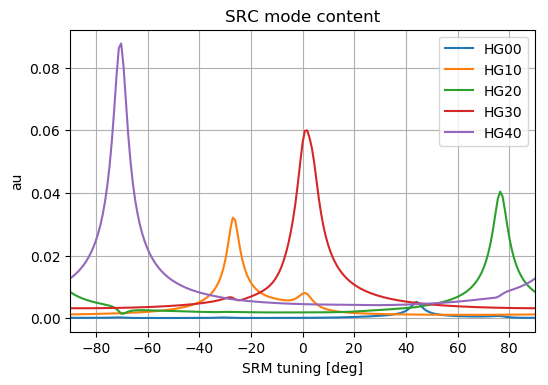

In [6]:
kat = base.deepcopy()
kat.maxtem = 4
kat.cTSRM.remove()

kat.parse("""
tem Laser  0 0 1.0 0.0
tem Laser  1 0 1.0 0.0
tem Laser  2 0 1.0 0.0
tem Laser  3 0 1.0 0.0
tem Laser  4 0 1.0 0.0

xaxis SRM phi lin -90 90 200
yaxis abs

pd P_HOM nSRM1*

ad C 0 0 0 nSRM1*
ad C10 1 0 0 nSRM1*
ad C20 2 0 0 nSRM1*
ad C30 3 0 0 nSRM1*
ad C40 4 0 0 nSRM1*


""")
kat.eom1.midx = 0
out = kat.run()

fig = plt.figure(dpi=100)
ax = fig.add_subplot(111)
#ax.plot(out.x,out['P_HOM'],label = 'DC output')
ax.plot(out.x, out['C'],label = 'HG00')
ax.plot(out.x, out['C10'],label = 'HG10')
ax.plot(out.x, out['C20'],label = 'HG20')
ax.plot(out.x, out['C30'],label = 'HG30')
ax.plot(out.x, out['C40'],label = 'HG40')

ax.set_xlim(out.x.min(),out.x.max())
ax.grid()
ax.legend()
ax.set_title('SRC mode content')
ax.set_xlabel('SRM tuning [deg]')
ax.set_ylabel('au')
plt.show(fig)


#print((out.x[out['C'].argmax()]))
#print((out.x[out['C40'].argmax()]))

# TSRC parameters


## Resonance conditions in TSRC


--------------------------------------------------------------
Running kat - Started at 2019-10-14 11:17:53.587008

Finished in 0.0216372 seconds


100% | ETA:  0:00:00 | Calculating                                             

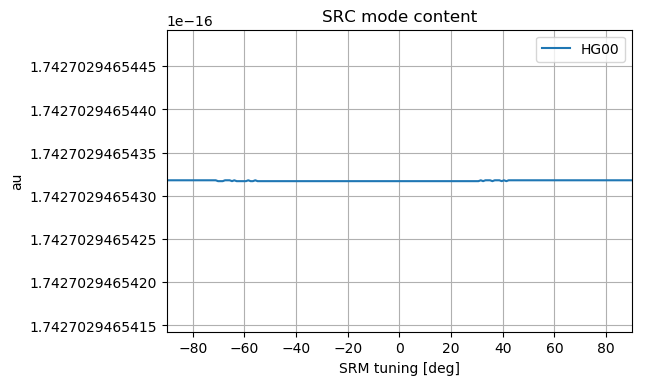


------------------------------------------------------------------------
                     FINESSE 2.2                (build 2.2-31-ge1141681)
       o_.-=.        Frequency domain INterferomEter Simulation SoftwarE
      (\'".\|        06.03.2019         http://www.gwoptics.org/finesse/
      .>' (_--.      
   _=/d   ,^\        Input file /var/folders/k1/yts33d_93v1_9yd1768nkwph0000gn/T/tmp0nq8g03k.kat,
  ~~ \)-'   '        Output file /var/folders/k1/yts33d_93v1_9yd1768nkwph0000gn/T/tmp0nq8g03k.out,
     / |             Gnuplot file /var/folders/k1/yts33d_93v1_9yd1768nkwph0000gn/T/tmp0nq8g03k.gnu 
    '  '                                        Mon Oct 14 11:17:53 2019
------------------------------------------------------------------------
 
 computation time:  0.00951112s



In [7]:
kat = base.deepcopy()
kat.maxtem = 'off'

kat.parse("""
ad C 0 0 0 nTSRM1
pd P_HOM nTSRM1*
xaxis TSRM phi lin -90 90 200
yaxis abs
trace 2
""")
kat.eom1.midx = 0

out = kat.run()

fig = plt.figure(dpi=100)
ax = fig.add_subplot(111)
#ax.plot(out.x,out['P_HOM'],label = 'DC output')
ax.plot(out.x, out['C'],label = 'HG00')


ax.set_xlim(out.x.min(),out.x.max())
ax.grid()
ax.legend()
ax.set_title('SRC mode content')
ax.set_xlabel('SRM tuning [deg]')
ax.set_ylabel('au')
plt.show(fig)

print(out.stdout)



## Curernt TSRC parameters

In [8]:
kat = base.deepcopy()


kat.parse("""
bp w_ex x w nEMx
bp w_ey x w nEMy
bp w_bs x w nBS4
bp w_srm x w nSRM1
bp w_tsrm x w nTSRM1

cp cSRMX x m
cp cSRMY x m
cp cSRMX y m
cp cSRMY y m 

cp cTSRM x m
cp cTSRM y m


noxaxis
yaxis abs

mismatches
""")
kat.eom1.midx = 0

out = kat.run()
print(out.stdout)
print()
print('      w (mm) max_w (mm)')
print('EX:  {:.4f}   {} '.format(out['w_ex']*1e3, w_etm*1e3 ))
print('EY:  {:.4f}   {} '.format(out['w_ey']*1e3, w_etm*1e3 ))
print('BS:  {:.4f}   {} '.format(out['w_bs']*1e3, w_bs*1e3 ))
print('SRM: {:.4f}   {} '.format(out['w_srm']*1e3, w_srm*1e3 ))
print('TSRM: {:.4f}   {} '.format(out['w_tsrm']*1e3, w_tsrm*1e3 ))

print()

print('EX:  diff = {:.2f} mm, rdiff = {:.2} '.format((out['w_ex']-w_etm)*1e3, (out['w_ex']-w_etm)/np.abs(w_etm) ) )
print('EY:  diff = {:.2f} mm, rdiff = {:.2} '.format((out['w_ey']-w_etm)*1e3, (out['w_ey']-w_etm)/np.abs(w_etm) ) )
print('BS:  diff = {:.2f} mm, rdiff = {:.2} '.format((out['w_bs']-w_bs)*1e3, (out['w_bs']-w_bs)/np.abs(w_bs) ) )
print('SRM: diff = {:.2f} mm, rdiff = {:.2} '.format((out['w_srm']-w_srm)*1e3, (out['w_srm']-w_srm)/np.abs(w_srm) ) )
print('TSRM: diff = {:.2f} mm, rdiff = {:.2} '.format((out['w_tsrm']-w_tsrm)*1e3, (out['w_tsrm']-w_tsrm)/np.abs(w_tsrm) ) )

print()

# Checking stability
# --------------------
mX_x = np.abs(out['cSRMX_x_m'])
mY_x = np.abs(out['cSRMY_x_m'])
mX_y = np.abs(out['cSRMX_x_m'])
mY_y = np.abs(out['cSRMY_x_m'])
mTSRM_x = np.abs(out['cTSRM_x_m'])
mTSRM_y = np.abs(out['cTSRM_y_m'])


if (not (mX_x > -1 and mX_x < 1) or not (mX_y > -1 and mX_y < 1) or 
    not (mY_x > -1 and mY_x < 1) or not (mY_y > -1 and mY_y < 1) or
    not (mTSRM_x > -1 and mTSRM_x < 1) or not (mTSRM_y > -1 and mTSRM_y < 1)):
    print('Cavity is unstable!!!!! :(')
    print('Stability parameters: {}  {}  {}  {}  {}  {}'.format(mX_x, mY_x, mX_y, mY_y, mTSRM_x, mTSRM_y ))
else:
    print('Cavity is stable! :) ')
    print('Stability parameters: {}  {}  {}  {}  {}  {}'.format(mX_x, mY_x, mX_y, mY_y, mTSRM_x, mTSRM_y))
# --------------------
  
    


Parsing `mismatches` into pykat object not implemented yet, added as extra line.
--------------------------------------------------------------
Running kat - Started at 2019-10-14 11:17:53.761709

Finished in 0.0168459 seconds

------------------------------------------------------------------------
                     FINESSE 2.2                (build 2.2-31-ge1141681)
       o_.-=.        Frequency domain INterferomEter Simulation SoftwarE
      (\'".\|        06.03.2019         http://www.gwoptics.org/finesse/
      .>' (_--.      
   _=/d   ,^\        Input file /var/folders/k1/yts33d_93v1_9yd1768nkwph0000gn/T/tmpjz4z5noc.kat,
  ~~ \)-'   '        Output file /var/folders/k1/yts33d_93v1_9yd1768nkwph0000gn/T/tmpjz4z5noc.out,
     / |             Gnuplot file /var/folders/k1/yts33d_93v1_9yd1768nkwph0000gn/T/tmpjz4z5noc.gnu 
    '  '                                        Mon Oct 14 11:17:53 2019
------------------------------------------------------------------------
 'noxaxis' has 

100% | ETA:  0:00:00 | Calculating                                             

## HOM spacing in TSRC

Parsing `tem Laser 0 0 1.0 0.0` into pykat object not implemented yet, added as extra line.
Parsing `tem Laser 1 0 1.0 0.0` into pykat object not implemented yet, added as extra line.
Parsing `tem Laser 2 0 1.0 0.0` into pykat object not implemented yet, added as extra line.
Parsing `tem Laser 3 0 1.0 0.0` into pykat object not implemented yet, added as extra line.
Parsing `tem Laser 4 0 1.0 0.0` into pykat object not implemented yet, added as extra line.
--------------------------------------------------------------
Running kat - Started at 2019-10-14 11:17:53.804710


100% | ETA:  0:00:00 | Calculating                                             


Finished in 0.329503 seconds


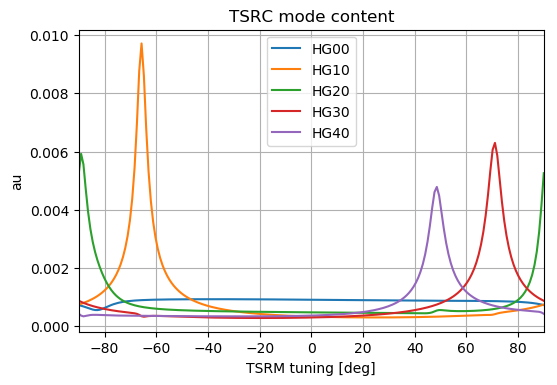


------------------------------------------------------------------------
                     FINESSE 2.2                (build 2.2-31-ge1141681)
       o_.-=.        Frequency domain INterferomEter Simulation SoftwarE
      (\'".\|        06.03.2019         http://www.gwoptics.org/finesse/
      .>' (_--.      
   _=/d   ,^\        Input file /var/folders/k1/yts33d_93v1_9yd1768nkwph0000gn/T/tmpiw7wylqh.kat,
  ~~ \)-'   '        Output file /var/folders/k1/yts33d_93v1_9yd1768nkwph0000gn/T/tmpiw7wylqh.out,
     / |             Gnuplot file /var/folders/k1/yts33d_93v1_9yd1768nkwph0000gn/T/tmpiw7wylqh.gnu 
    '  '                                        Mon Oct 14 11:17:53 2019
------------------------------------------------------------------------
 --- cavity tracing
 cavity cSRMX:
  cavity is stable! Eigenvalues:
  q=-0.889485+0.736915j, w0=499.579491435672um z=-889.485321528425mm m=-0.849778
  finesse : 3.71879, round-trip power loss: 0.7975 [/100]
  opt. length: 2.427m, FSR: 123.523

In [9]:
kat = base.deepcopy()
kat.maxtem = 4

kat.parse("""
tem Laser  0 0 1.0 0.0
tem Laser  1 0 1.0 0.0
tem Laser  2 0 1.0 0.0
tem Laser  3 0 1.0 0.0
tem Laser  4 0 1.0 0.0

xaxis TSRM phi lin -90 90 200
yaxis abs

pd P_HOM nTSRM1*

ad C 0 0 0 nTSRM1*
ad C10 1 0 0 nTSRM1*
ad C20 2 0 0 nTSRM1*
ad C30 3 0 0 nTSRM1*
ad C40 4 0 0 nTSRM1*

trace 10
""")
kat.eom1.midx = 0
out = kat.run()

fig = plt.figure(dpi=100)
ax = fig.add_subplot(111)
#ax.plot(out.x,out['P_HOM'],label = 'DC output')
ax.plot(out.x, out['C'],label = 'HG00')
ax.plot(out.x, out['C10'],label = 'HG10')
ax.plot(out.x, out['C20'],label = 'HG20')
ax.plot(out.x, out['C30'],label = 'HG30')
ax.plot(out.x, out['C40'],label = 'HG40')

ax.set_xlim(out.x.min(),out.x.max())
ax.grid()
ax.legend()
ax.set_title('TSRC mode content')
ax.set_xlabel('TSRM tuning [deg]')
ax.set_ylabel('au')
plt.show(fig)


print(out.stdout)

## Mode overlap  between SRC and TSRC

In [57]:
kat = base.deepcopy()


kat.parse("""
bp q_srmx1 x q nSRM1
bp q_srmx2 y q nSRM1

bp q_srmy1 x q nSRM1
bp q_srmy2 y q nSRM1

bp q_tsrm1 x q nTSRM1
bp q_tsrm2 y q nTSRM1


noxaxis
yaxis abs:deg
mismatches
""")
kat.eom1.midx = 0

out = kat.run()
print(out.stdout)

Parsing `mismatches` into pykat object not implemented yet, added as extra line.
--------------------------------------------------------------
Running kat - Started at 2019-10-14 11:25:47.950626

Finished in 0.0176058 seconds

------------------------------------------------------------------------
                     FINESSE 2.2                (build 2.2-31-ge1141681)
       o_.-=.        Frequency domain INterferomEter Simulation SoftwarE
      (\'".\|        06.03.2019         http://www.gwoptics.org/finesse/
      .>' (_--.      
   _=/d   ,^\        Input file /var/folders/k1/yts33d_93v1_9yd1768nkwph0000gn/T/tmpfe_u0azr.kat,
  ~~ \)-'   '        Output file /var/folders/k1/yts33d_93v1_9yd1768nkwph0000gn/T/tmpfe_u0azr.out,
     / |             Gnuplot file /var/folders/k1/yts33d_93v1_9yd1768nkwph0000gn/T/tmpfe_u0azr.gnu 
    '  '                                        Mon Oct 14 11:25:47 2019
------------------------------------------------------------------------
 'noxaxis' has 

100% | ETA:  0:00:00 | Calculating                                             

In [56]:
def overlap(q_1, q_2):
    return 4.0*np.abs(q_1.imag * q_2.imag)/np.abs( q_1.conjugate() - q_2)**2


In [16]:
q1_x = out['q_srmx1']
q1_y = out['q_srmx2']

q2_x = out['q_srmy1']
q2_y = out['q_srmy2']

q3_x = out['q_tsrm1']
q3_y = out['q_tsrm2']

print(q1_x)

(0.32576609935602624+0.7385178719722433j)


In [13]:
overlap(q1_x,q3_x)

overlap(q2_x,q3_x)

0.03203332479639405